<a href="https://colab.research.google.com/github/ALRIER/DtaScienceAssignments_WaterlooUniversity/blob/Assignments/Stats4DataScience/Stats4DS_assig4_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 4

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for Y and/or X until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [1]:
#your work here

In [2]:
import sklearn.linear_model
import scipy, scipy.stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
%matplotlib inline

In [3]:
from google.colab import drive
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')   
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read the data
s1 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 1')
s2 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 2')
s3 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 3')
s4 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 4')
s5 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 5')
s6 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 6')
print(s1.head())
print(s2.head())
print(s3.head())
print(s4.head())
print(s5.head())
print(s6.head())

           y         x
0  38.858144  7.266278
1  40.891148  7.985333
2  48.971648  9.387120
3  46.410124  9.382849
4  25.333391  5.240903
           y         x
0  28.045621  4.299210
1  39.148284  4.528143
2  17.361044  3.284988
3  18.413561  5.709732
4   7.857464  3.242708
              Y      x
0   6428.915770  9.517
1   2640.000728  5.113
2  12858.599267  9.773
3   5491.450053  8.428
4   2838.820108  5.752
              Y       x
0  1.887192e+05  5.9947
1  7.107264e+03  3.9492
2  3.729064e+06  9.6353
3  5.691779e+02  0.4943
4  3.022130e+06  9.0811
           Y       X
0  47.320319  9.0527
1  39.862491  7.3135
2  42.225779  8.6471
3  30.010689  5.8579
4  43.900459  7.9357
           y       x
0  -2.764835  1.1290
1  61.065734  6.9100
2  52.854588  7.8374
3  -2.881062  0.1335
4  59.045448  9.2425


Text(0.5, 1.0, 'Plot S6')

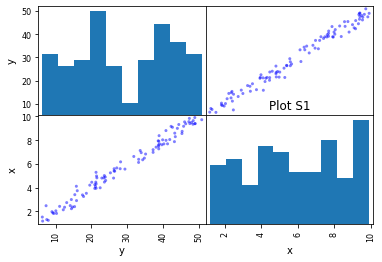

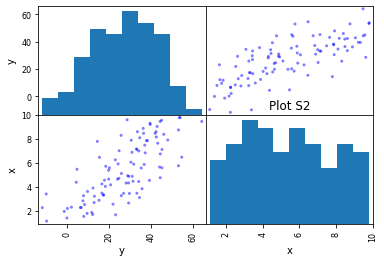

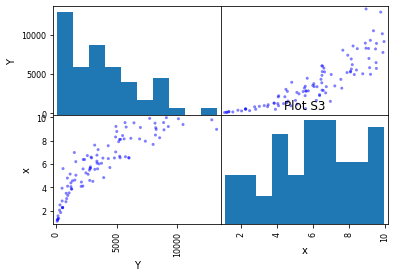

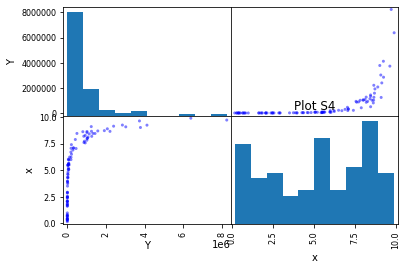

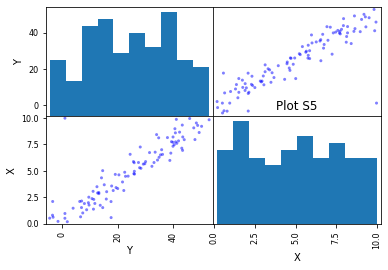

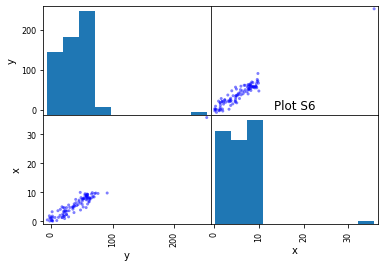

In [5]:
scatter_matrix = pd.plotting.scatter_matrix(s1, diagonal='hist', color='blue')
plt.title('Plot S1')
scatter_matrix = pd.plotting.scatter_matrix(s2, diagonal='hist', color='blue')
plt.title('Plot S2')
scatter_matrix = pd.plotting.scatter_matrix(s3, diagonal='hist', color='blue')
plt.title('Plot S3') #It needs a transformation
scatter_matrix = pd.plotting.scatter_matrix(s4, diagonal='hist', color='blue')
plt.title('Plot S4') #It needs a transformation
scatter_matrix = pd.plotting.scatter_matrix(s5, diagonal='hist', color='blue')
plt.title('Plot S5')
scatter_matrix = pd.plotting.scatter_matrix(s6, diagonal='hist', color='blue')
plt.title('Plot S6')

# SET 1

In [119]:
s1 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 1')

Text(0.5, 1.0, 'Plot S1')

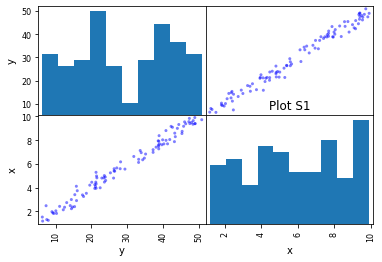

In [120]:
scatter_matrix = pd.plotting.scatter_matrix(s1, diagonal='hist', color='blue')
plt.title('Plot S1')

In [145]:
corr_matrix = s1.corr()
print(corr_matrix)

          y         x
y  1.000000  0.989468
x  0.989468  1.000000


From the scatter plot, we can see that there is a generally linear relationship between the variables. There are some outliers, but they do not appear to have a significant effect on the overall linear relationship. The correlation coefficient between the variables is 0.989, which indicates a strong positive linear relationship.

Therefore, it seems reasonable to assume that the linear assumptions are valid for this dataset, and linear regression analysis may be an appropriate method to model the relationship between the variables.

In [121]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
result = smf.ols(formula='y ~ x', data=s1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           4.47e-84
Time:                        22:09:44   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.6

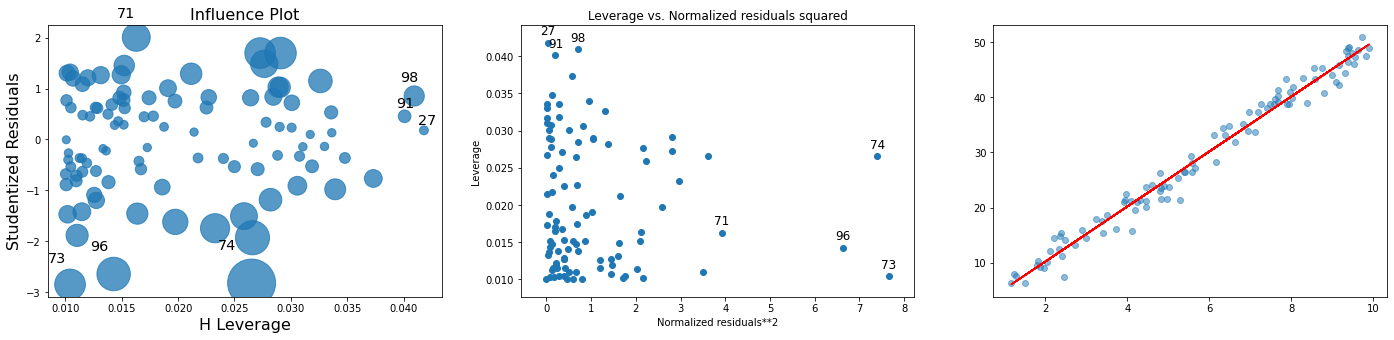

In [123]:
import statsmodels.api as sm
import statsmodels.graphics as smg
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
smg.regressionplots.influence_plot(result, ax=ax1, criterion="cooks")
plot_leverage_resid2(result, ax=ax2)
y_predr = result.predict(s1['x'])
plt.scatter(s1['x'], s1['y'], alpha=0.5)
plt.plot(s1['x'], y_predr, color='red')
plt.show()


In [12]:
# Get studentized residuals and leverage values
influence = result.get_influence()
studentized_residuals = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag

In [13]:
outlier_indexes = (np.abs(studentized_residuals) > 3) | (leverage > 3 * ((result.df_model + 1) / result.nobs))
s1 = s1.drop(s1.index[outlier_indexes])

In [14]:
resultClean1 = smf.ols(formula='y ~ x', data=s1).fit()
print(resultClean1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           4.47e-84
Time:                        21:42:46   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.6

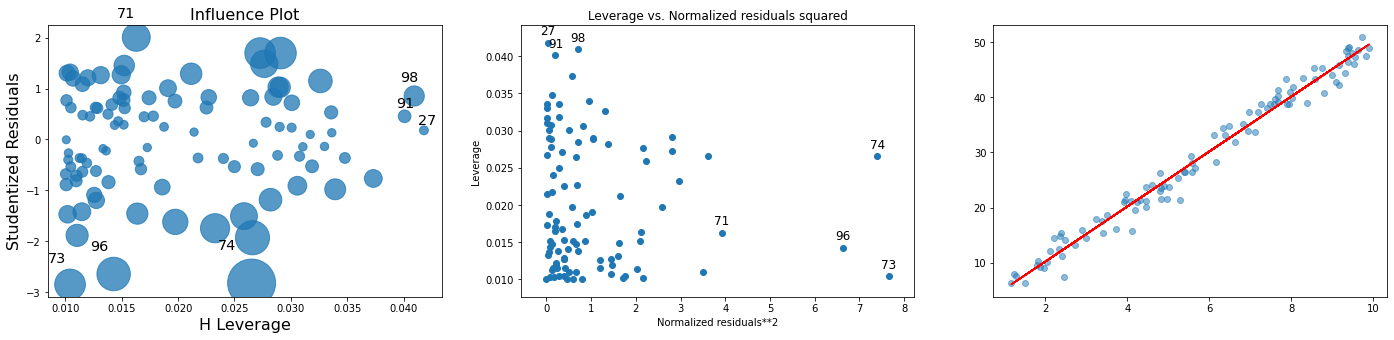

In [126]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
smg.regressionplots.influence_plot(resultClean1, ax=ax1, criterion="cooks")
fig = plot_leverage_resid2(resultClean1, ax=ax2)
y_pred = resultClean1.predict(s1['x'])
plt.scatter(s1['x'], s1['y'], alpha=0.5)
plt.plot(s1['x'], y_pred, color='red')
plt.show()

In this case, based on the r2, is possible to conclude that the model explains 97.9% of the variance in the dependent variable.

The intercept is 0.2381. However, the p-value associated with the intercept is not significant (0.613), indicating that the intercept is not significantly different from zero.

The F-statistic is 4579 with a very small p-value, indicating that the model is significant. In this case, the skewness is -0.536 and the kurtosis is 2.988, which suggests that the distribution is slightly negatively skewed and moderately peaked. The Jarque-Bera test is performed to test the normality of the residuals, and in this case, the test is not significant (0.0915), which suggests that the residuals are approximately normally distributed.

#SET 2

In [77]:
s2 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 2')

Text(0.5, 1.0, 'Plot S2')

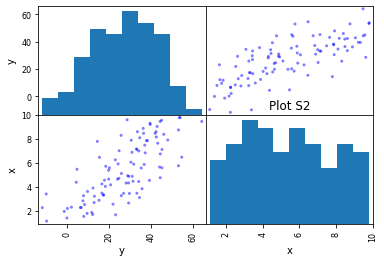

In [78]:
scatter_matrix = pd.plotting.scatter_matrix(s2, diagonal='hist', color='blue')
plt.title('Plot S2')

In [146]:
corr_matrix = s2.corr()
print(corr_matrix)

          y         x
y  1.000000  0.745168
x  0.745168  1.000000


In [79]:
result2 = smf.ols(formula='y ~ x', data=s2).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           6.11e-19
Time:                        21:46:27   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.6

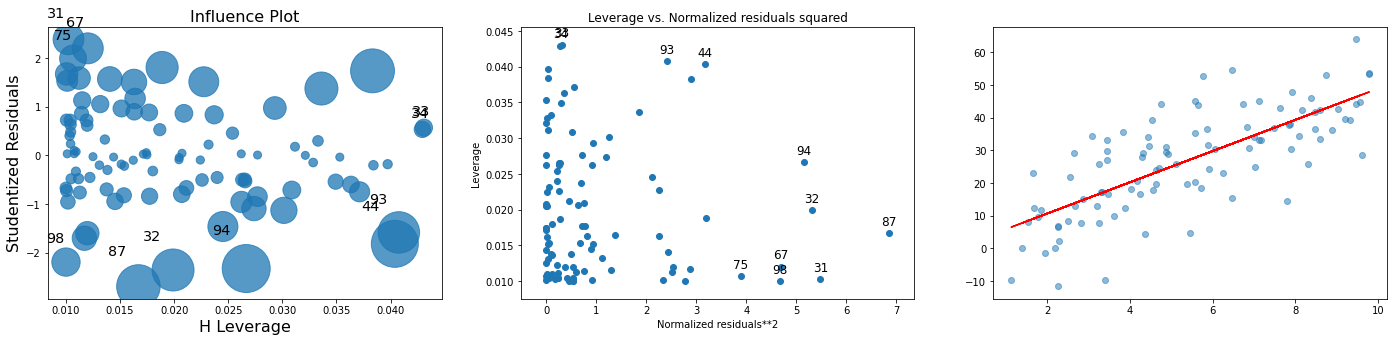

In [122]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
smg.regressionplots.influence_plot(result2, ax=ax1, criterion="cooks")
plot_leverage_resid2(result2, ax=ax2)
y_predr = result2.predict(s2['x'])
plt.scatter(s2['x'], s2['y'], alpha=0.5)
plt.plot(s2['x'], y_predr, color='red')
plt.show()

Based on the scatter plot and the linear regression line, it appears that the relationship between the two variables is roughly linear. However, there is some variability in the data points around the regression line. 

In [24]:
# Get studentized residuals and leverage values
influence = result2.get_influence()
studentized_residuals = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag

In [25]:
outlier_indexes = (np.abs(studentized_residuals) > 3) | (leverage > 3 * ((result2.df_model + 1) / result2.nobs))
s2 = s2.drop(s2.index[outlier_indexes])

In [26]:
resultClean2 = smf.ols(formula='y ~ x', data=s2).fit()
print(resultClean2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           6.11e-19
Time:                        21:42:51   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.6

This model tells us that 55.5% of the changes in the dependent variable can be explained by changes in the independent variable. The F-statistic of 122.4 with a p-value of 6.11e-19 tells us that the overall model is a good fit for the data. The intercept value is 1.0956, which means that when the independent variable is zero, the dependent variable is predicted to have a value of 1.0956. The coefficient for the independent variable (x) is 4.7774, indicating that for each increase of one unit in x, the dependent variable is expected to increase by 4.7774 units.

Although the p-values for the intercept and x coefficient are greater than 0.05, suggesting they are not statistically significant.

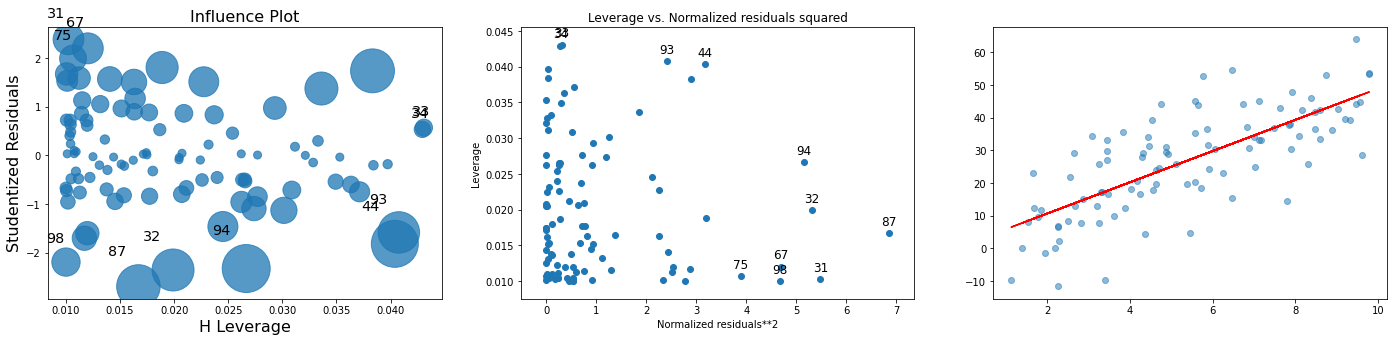

In [128]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
smg.regressionplots.influence_plot(resultClean2, ax=ax1, criterion="cooks")
plot_leverage_resid2(resultClean2, ax=ax2)
y_pred = resultClean2.predict(s2['x'])
plt.scatter(s2['x'], s2['y'], alpha=0.5)
plt.plot(s2['x'], y_pred, color='red')
plt.show()

#SET 3

In [30]:
s3 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 3')

Text(0.5, 1.0, 'Plot S3')

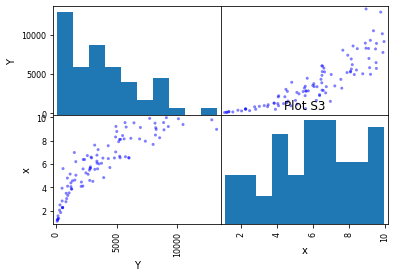

In [31]:
scatter_matrix = pd.plotting.scatter_matrix(s3, diagonal='hist', color='blue')
plt.title('Plot S3') #It needs a transformation

Based on the scatter plot, it appears that there is no clear linear relationship between 'X' and 'Y'. 

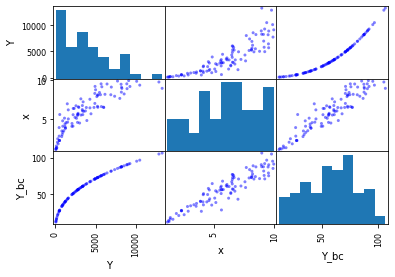

In [148]:
from scipy.stats import boxcox
s3 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 3')
s3['Y_bc'], lam = boxcox(s3['Y'])
scatter_matrix = pd.plotting.scatter_matrix(s3, diagonal='hist', color='blue')

Based on the Box-Cox transformation, it appears that the relationship between the transformed variable Y_bc and the x variable is linear. Therefore, further analysis needs to be done. 

In [149]:
result3 = smf.ols(formula='y ~ x', data=s3).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     641.8
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           8.32e-45
Time:                        00:35:20   Log-Likelihood:                -353.39
No. Observations:                 100   AIC:                             710.8
Df Residuals:                      98   BIC:                             716.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7418      2.229      2.576      0.0

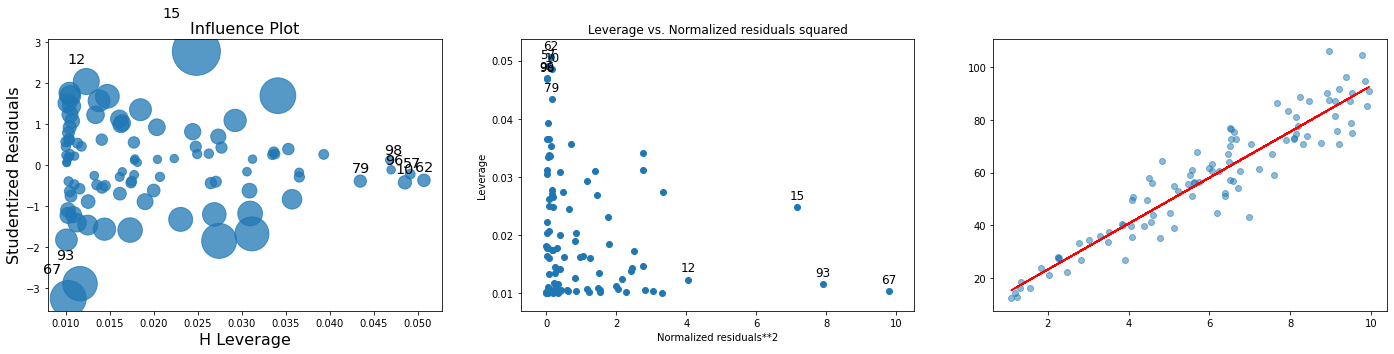

In [130]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
smg.regressionplots.influence_plot(result3, ax=ax1, criterion="cooks")
plot_leverage_resid2(result3, ax=ax2)
y_pred = result3.predict(s3['x'])
plt.scatter(s3['x'], s3['Y_bc'], alpha=0.5)
plt.plot(s3['x'], y_pred, color='red')
plt.show()

In [37]:
# Get studentized residuals and leverage values
influence = result3.get_influence()
studentized_residuals = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag


In [38]:
outlier_indexes = (np.abs(studentized_residuals) > 3) | (leverage > 3 * ((result3.df_model + 1) / result3.nobs))
s3 = s3.drop(s3.index[outlier_indexes])

In [150]:
resultClean3 = smf.ols(formula='Y_bc ~ x', data=s3).fit()
print(resultClean3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Y_bc   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     641.8
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           8.32e-45
Time:                        00:35:28   Log-Likelihood:                -353.39
No. Observations:                 100   AIC:                             710.8
Df Residuals:                      98   BIC:                             716.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7418      2.229      2.576      0.0

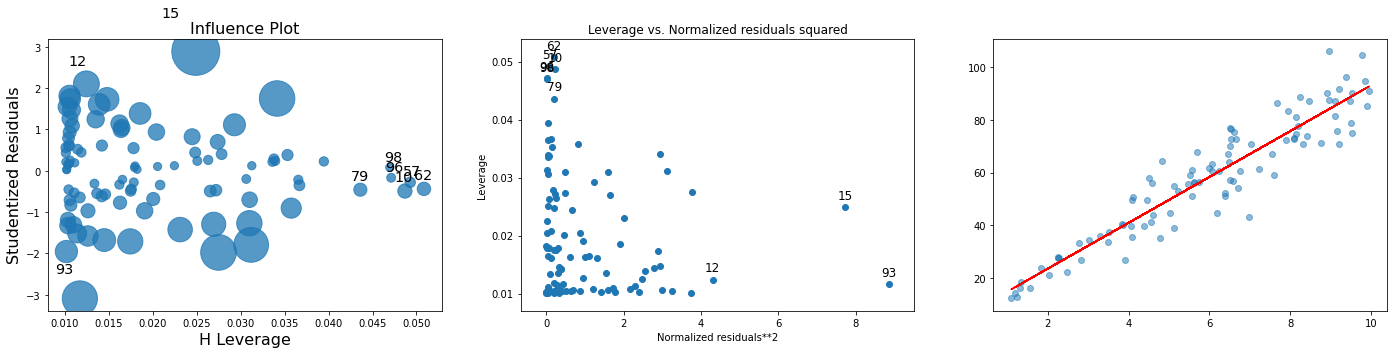

In [131]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
smg.regressionplots.influence_plot(resultClean3, ax=ax1, criterion="cooks")
plot_leverage_resid2(resultClean3, ax=ax2)
y_pred = resultClean3.predict(s3['x'])
plt.scatter(s3['x'], s3['Y_bc'], alpha=0.5)
plt.plot(s3['x'], y_pred, color='red')
plt.show()

Comparing the two models, we can see that the model without outliers has a higher R2 0.879 vs 0.868. Additionally, in the model without outliers, the intercept coefficient is 6.1103, which means that when x is zero, the expected value of Y_bc is 6.1103. In the model with outliers, the intercept coefficient is 5.7418, indicating that when x is zero, the expected value of Y is 5.7418 after back-transforming from the Box-Cox transformation.

#SET4

In [42]:
s4 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 4')

Text(0.5, 1.0, 'Plot S4')

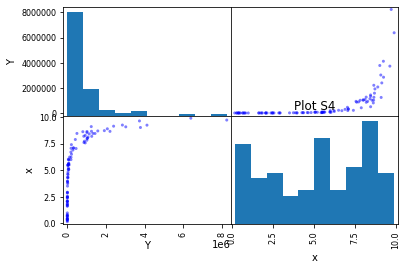

In [43]:
scatter_matrix = pd.plotting.scatter_matrix(s4, diagonal='hist', color='blue')
plt.title('Plot S4') #It needs a transformation

It is posible to observe that the relationship between the variables does not seem to be linear. There are several points that are significantly far from the general trend, which indicates that the linear assumptions may not be valid. 

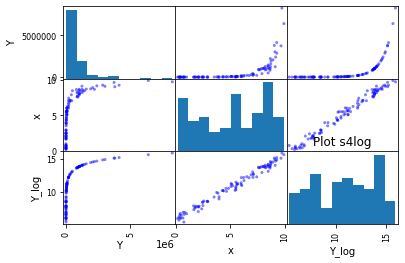

In [151]:
s4['Y_log'] = np.log(s4['Y'])
scatter_matrix1 = pd.plotting.scatter_matrix(s4, diagonal='hist', color='blue'), plt.title('Plot s4log')

After applying the log transformation to Y, the scatter plot matrix suggests a better linearity in the relationship between X and Y. The transformed Y values are spread more evenly across the range of X values, which is an indication of a more linear relationship.

In [45]:
result4 = smf.ols(formula='Y_log ~ x', data=s4).fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_log   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           6.91e-89
Time:                        21:43:01   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.0

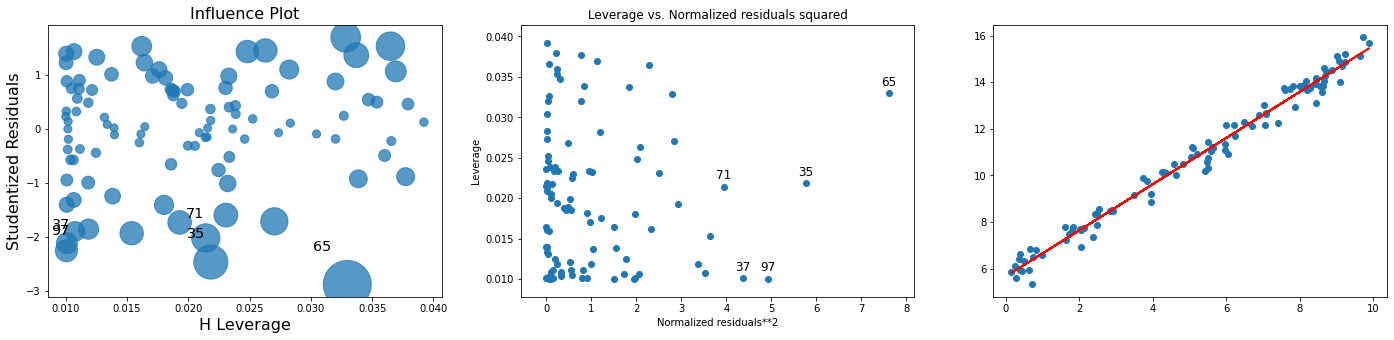

In [133]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
smg.regressionplots.influence_plot(result4, ax=ax1, criterion="cooks")
plot_leverage_resid2(result4, ax=ax2)
y_predr = result4.predict(s4['x'])
plt.scatter(s4['x'], s4['Y_log'], alpha=1)
plt.plot(s4['x'], y_predr, color='red')
plt.show()

In [49]:
# Get studentized residuals and leverage values
influence = result4.get_influence()
studentized_residuals = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag


In [50]:
outlier_indexes = (np.abs(studentized_residuals) > 3) | (leverage > 3 * ((result4.df_model + 1) / result4.nobs))
s4 = s4.drop(s4.index[outlier_indexes])

In [51]:
resultClean4 = smf.ols(formula='Y_log ~ x', data=s4).fit()
print(resultClean4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Y_log   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           6.91e-89
Time:                        21:43:03   Log-Likelihood:                -46.034
No. Observations:                 100   AIC:                             96.07
Df Residuals:                      98   BIC:                             101.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6647      0.078     72.264      0.0

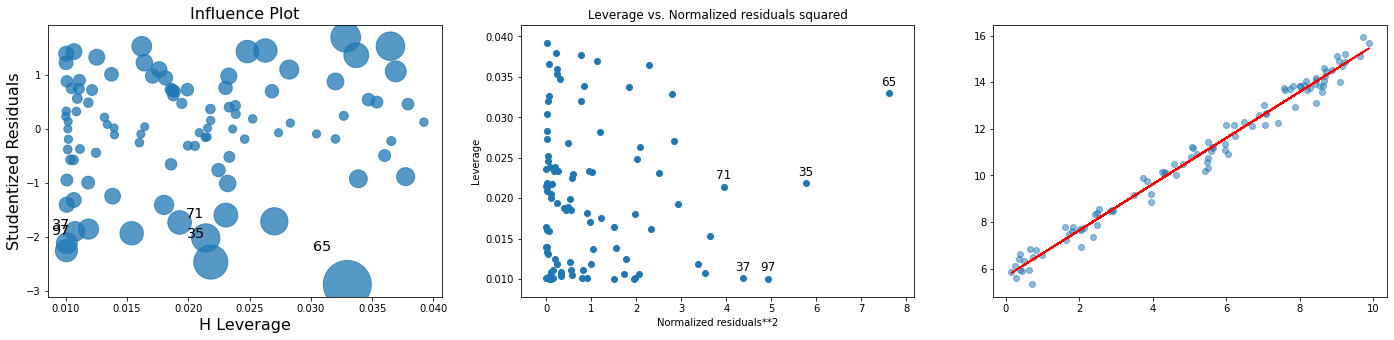

In [134]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
smg.regressionplots.influence_plot(resultClean4, ax=ax1, criterion="cooks")
plot_leverage_resid2(resultClean4, ax=ax2)
y_pred = resultClean4.predict(s4['x'])
plt.scatter(s4['x'], s4['Y_log'], alpha=0.5)
plt.plot(s4['x'], y_pred, color='red')
plt.show()

The model indicates that 98.3% of the variation in the dependent variable is explained by the independent variable. The intercept of the model is 5.6647, which represents the value of the dependent variable when the independent variable is zero and the p-values for both the intercept and slope coefficient are significant at 0.000, indicating that the model is a good fit for the data, and the relationship between the independent and dependent variables is statistically significant.

#SET5

In [153]:
s5 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 5')

Text(0.5, 1.0, 'Plot S5')

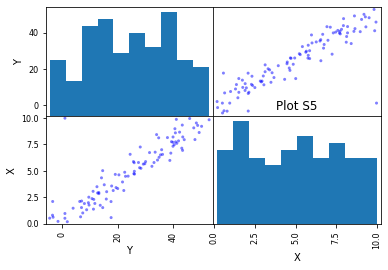

In [154]:
scatter_matrix = pd.plotting.scatter_matrix(s5, diagonal='hist', color='blue')
plt.title('Plot S5')

it seems that there is a positive linear relationship between the two variables.

In [155]:
result5 = smf.ols(formula='Y ~ X', data=s5).fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           4.70e-37
Time:                        00:36:25   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.4

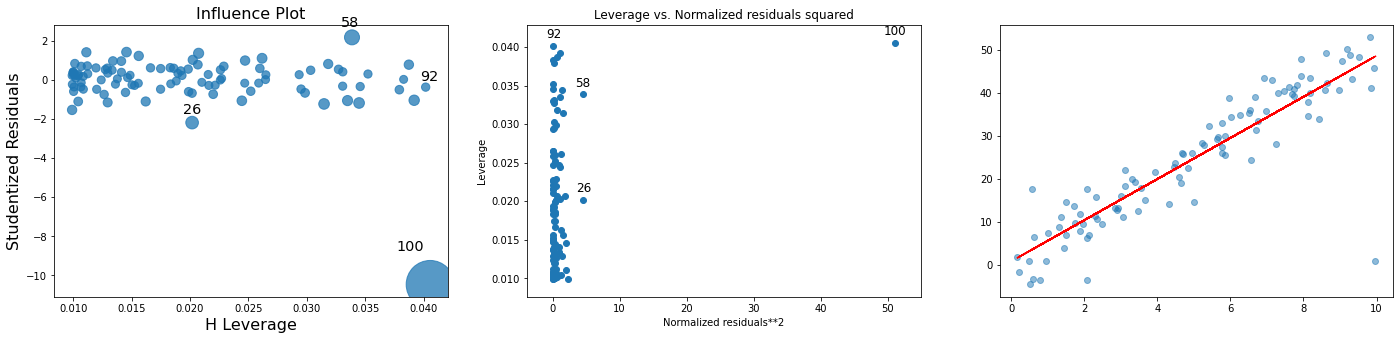

In [156]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
smg.regressionplots.influence_plot(result5, ax=ax1, criterion="cooks")
plot_leverage_resid2(result5, ax=ax2)
y_predr = result5.predict(s5['X'])
plt.scatter(s5['X'], s5['Y'], alpha=0.5)
plt.plot(s5['X'], y_predr, color='red')
plt.show()

In [157]:
influence = result5.get_influence()
studentized_residuals = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag
outlier_indexes = (np.abs(studentized_residuals) > 3) | (leverage > 3 * ((result5.df_model + 1) / result5.nobs))
s5 = s5.drop(s5.index[outlier_indexes])
resultClean5 = smf.ols(formula='Y ~ X', data=s5).fit()
print(resultClean5.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           3.84e-52
Time:                        00:36:29   Log-Likelihood:                -294.13
No. Observations:                 100   AIC:                             592.3
Df Residuals:                      98   BIC:                             597.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0993      0.935     -0.106      0.9

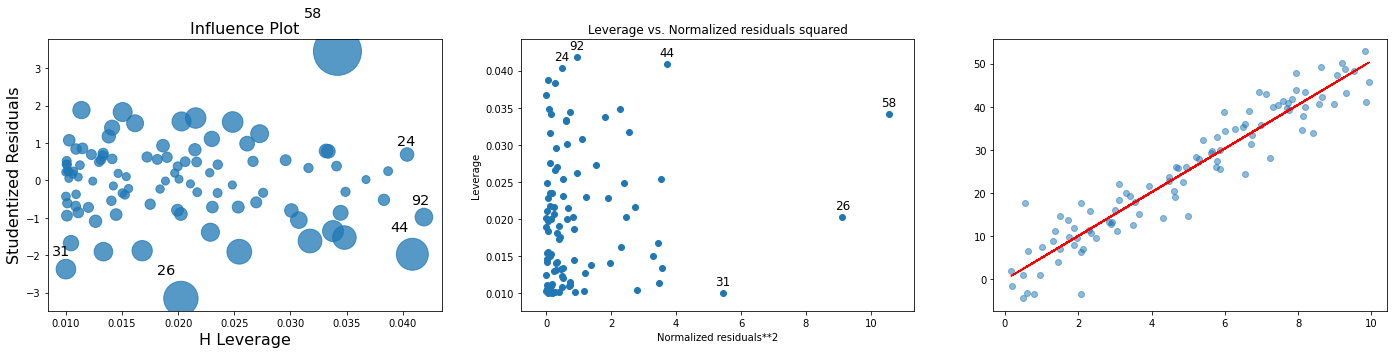

In [142]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
smg.regressionplots.influence_plot(resultClean5, ax=ax1, criterion="cooks")
plot_leverage_resid2(resultClean5, ax=ax2)
y_pred = resultClean5.predict(s5['X'])
plt.scatter(s5['X'], s5['Y'], alpha=0.5)
plt.plot(s5['X'], y_pred, color='red')
plt.show()

In the model without outliers the r2 is 0.906, which is higher than the r2 for the model with outliers (0.806). This indicates that the model without outliers explains more of the variance in the data.

Additionally, the F-statistic for the model without outliers is 945.8, which is higher than the model with outliers (411.9). This suggests that the model without outliers is a better fit for the data.

Finally, the coefficients for the X variable are also higher in the model without outliers indicating that the relationship between X and Y is stronger in the previousmentioned model.

This suggests that removing the outliers from this model improves significantly performance

#SET 6

In [158]:
s6 = pd.read_excel('/content/drive/MyDrive/Waterloo Datascience. /Statistics 4 Datascience/Assignment4LinearRegresion/Assignment4_linear_regresion_data.xlsx', sheet_name='Set 6')


Text(0.5, 1.0, 'Plot S6')

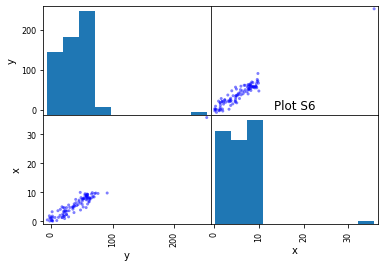

In [159]:
scatter_matrix = pd.plotting.scatter_matrix(s6, diagonal='hist', color='blue')
plt.title('Plot S6')

Based on the graphic it appears to be a linear relationship in the X and Y variables; this is based on the form of how the observations are grouped. 

In [160]:
result6 = smf.ols(formula='y ~ x', data=s6).fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.49e-54
Time:                        00:36:55   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.8

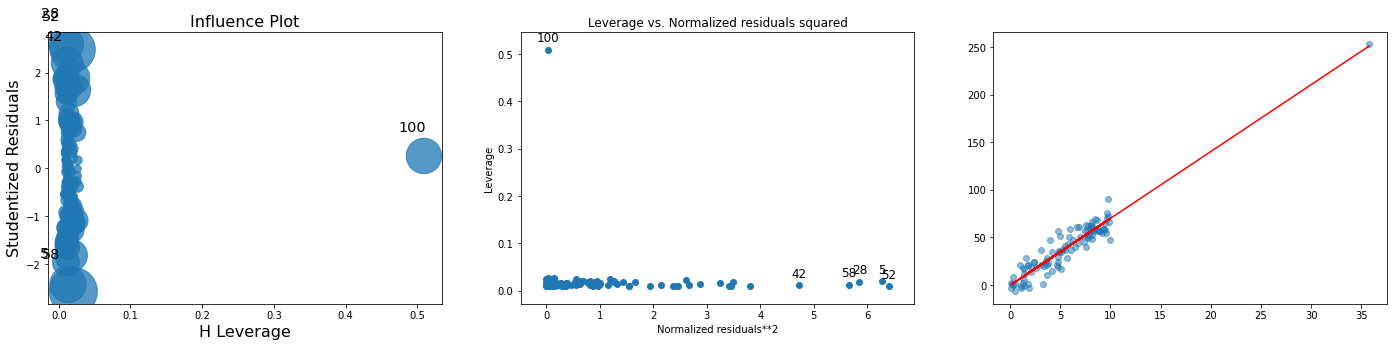

In [161]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
smg.regressionplots.influence_plot(result6, ax=ax1, criterion="cooks")
plot_leverage_resid2(result6, ax=ax2)
y_pred = result6.predict(s6['x'])
ax3.scatter(s6['x'], s6['y'], alpha=0.5)
ax3.plot(s6['x'], y_pred, color='red')
plt.show()


In [162]:
influence = result6.get_influence()
studentized_residuals = influence.resid_studentized_internal
leverage = influence.hat_matrix_diag
#remove outliers
outlier_indexes = (np.abs(studentized_residuals) > 3) | (leverage > 3 * ((result6.df_model + 1) / result6.nobs))
s6 = s6.drop(s6.index[outlier_indexes])
resultClean6 = smf.ols(formula='y ~ x', data=s6).fit()
print(resultClean6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           2.29e-40
Time:                        00:37:00   Log-Likelihood:                -364.34
No. Observations:                 100   AIC:                             732.7
Df Residuals:                      98   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0203      1.899     -0.011      0.9

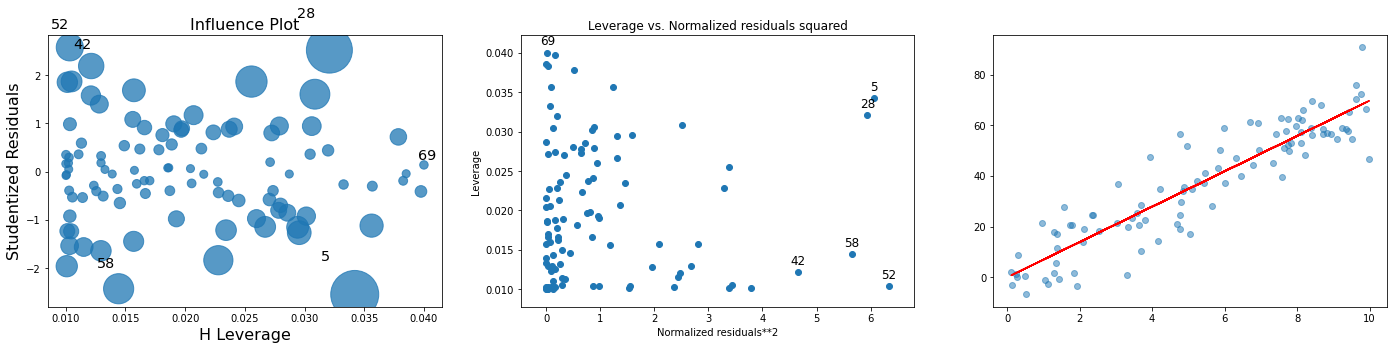

In [163]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
smg.regressionplots.influence_plot(resultClean6, ax=ax1, criterion="cooks")
plot_leverage_resid2(resultClean6, ax=ax2)
y_pred = resultClean6.predict(s6['x'])
ax3.scatter(s6['x'], s6['y'], alpha=0.5)
ax3.plot(s6['x'], y_pred, color='red')
plt.show()

The results of the model suggest that removing outliers from the model did not significantly improve its performance. However, the r2 of 0.83 indicates that the independent variable explains 83% of the variation in the dependent variable. The intercept is negative, and the high p-value suggests that the prediction is not statistically significant. Additionally, the F-statistic of 502.7 indicates that the data does not fit well with the model.